In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPROCESSING

In [2]:
data = pd.read_csv("/home/adarsh/Documents/MACHINE LEARNING - PROJECTS/Data/HR_analytics/train.csv")

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
data.shape

(54808, 14)

In [7]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
data['education']

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object

In [9]:
data['education'][data['education'].isna()] = data['education'].mode()[0]

/home/adarsh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
data['previous_year_rating'][data['previous_year_rating'].isna()] = data['previous_year_rating'].mean()

/home/adarsh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [13]:
databackup = data.copy()

In [14]:
data.shape

(54808, 14)

In [15]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [16]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [17]:
data.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004364,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.059804,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.005710,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004364,-0.059804,0.005710,1.000000,0.000239,0.338134,0.026669,0.072065,0.153406
length_of_service,0.001274,-0.057275,0.657111,0.000239,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.338134,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026669,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.072065,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153406,-0.010670,0.221582,0.195871,0.181147,1.000000


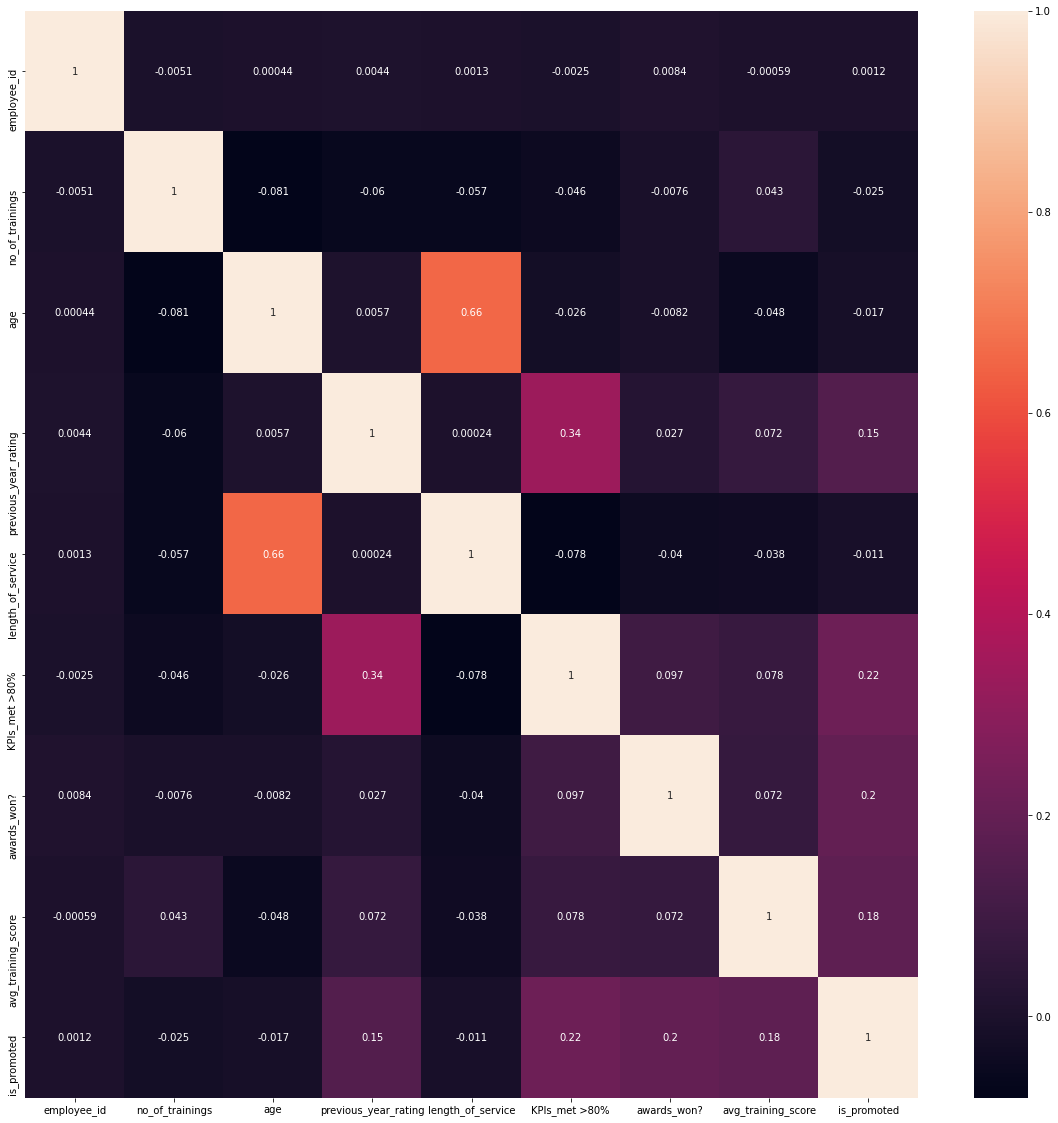

In [18]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(data[top_corr_features].corr(), annot = True)

In [19]:
y = data['is_promoted']
x = data.drop(['employee_id', 'is_promoted'] , axis = 1)

In [20]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [21]:
x = pd.get_dummies(x)

In [22]:
x.shape

(54808, 58)

In [23]:
x.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0


# XGBOOST

In [24]:
parameters = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [26]:
classifier=xgboost.XGBClassifier()

In [27]:
random_search=RandomizedSearchCV(classifier, parameters, n_iter=5, scoring='f1', n_jobs=-1, cv=10, verbose=3)

In [28]:
random_search.fit(x, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributio

In [29]:
x.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [49]:
random_search.best_estimator_.predict(test_x)

array([0, 0, 0, ..., 0, 0, 1])

In [31]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [32]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [33]:
from sklearn.model_selection import cross_val_score
f1_scores = cross_val_score(classifier, x, y, cv=10, scoring='f1')

In [34]:
f1_scores

array([0.50310559, 0.51234568, 0.47133758, 0.50306748, 0.48888889,
       0.51896813, 0.51162791, 0.53963415, 0.51321928, 0.49922481])

In [35]:
f1_scores.mean()

0.5061419499902597

# TEST DATA

In [36]:
test = pd.read_csv("/home/adarsh/Documents/MACHINE LEARNING - PROJECTS/Data/HR_analytics/test.csv")

In [37]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [38]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [39]:
test['education'][test['education'].isna()] = test['education'].mode()[0]

/home/adarsh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
test['previous_year_rating'][test['previous_year_rating'].isna()] = test['previous_year_rating'].mean()

/home/adarsh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [42]:
test_x = test.drop('employee_id', axis = 1)

In [43]:
test_x = pd.get_dummies(test_x)

In [44]:
classifier.fit(x, y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [45]:
y_prediction = classifier.predict(test_x)

In [46]:
print(y_prediction)

[0 0 0 ... 0 0 1]


In [47]:
my_submission = pd.DataFrame({'employee_id': test.employee_id, 'is_promoted': y_prediction})

In [48]:
my_submission.to_csv('submission_XG2.csv', index = False)